# Abhiek Bist

I am intrested in determining the corelation between airquality and temperature

# Loading Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from project_functions2 import *

data = load_and_clean("../data/raw/AirQuality.csv")
data = fix_Data(data)
display(data)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


# EDA

In [2]:
print(data.shape)

(9357, 15)


In [3]:
data.max(axis=0)

DATE            31/12/2004
TIME              23.00.00
CO_GT                 11.9
PT08_S1_CO          2040.0
NMHC_GT             1189.0
C6H6_GT               63.7
PT08_S2_NMHC        2214.0
NOX_GT              1479.0
PT08_S3_NOX         2683.0
NO2_GT               340.0
PT08_S4_NO2         2775.0
PT08_S5_O3          2523.0
T                     44.6
RH                    88.7
AH                   2.231
dtype: object

In [4]:
data.min(axis=0)

DATE            01/01/2005
TIME              00.00.00
CO_GT               -200.0
PT08_S1_CO          -200.0
NMHC_GT             -200.0
C6H6_GT             -200.0
PT08_S2_NMHC        -200.0
NOX_GT              -200.0
PT08_S3_NOX         -200.0
NO2_GT              -200.0
PT08_S4_NO2         -200.0
PT08_S5_O3          -200.0
T                   -200.0
RH                  -200.0
AH                  -200.0
dtype: object

Text(0.5, 1.0, 'co-relation between variables')

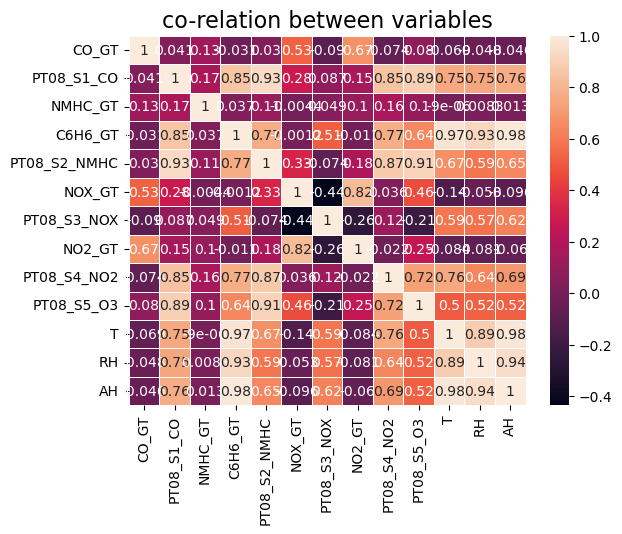

In [5]:
sns.heatmap(data.corr(),annot=True, linewidths=.4)
plt.title('co-relation between variables',fontsize=16)

In [6]:
df1 = data.corr()

df1 = df1["T"].sort_values( axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

display(df1)

NOX_GT         -0.138452
NO2_GT         -0.084104
CO_GT          -0.068939
NMHC_GT        -0.000009
PT08_S5_O3      0.503700
PT08_S3_NOX     0.588111
PT08_S2_NMHC    0.669025
PT08_S1_CO      0.754844
PT08_S4_NO2     0.755060
RH              0.885911
C6H6_GT         0.971375
AH              0.981001
T               1.000000
Name: T, dtype: float64

<AxesSubplot:>

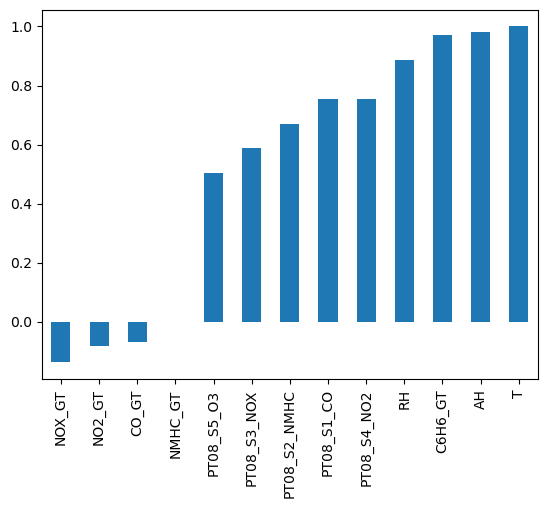

In [7]:
df1.plot.bar()

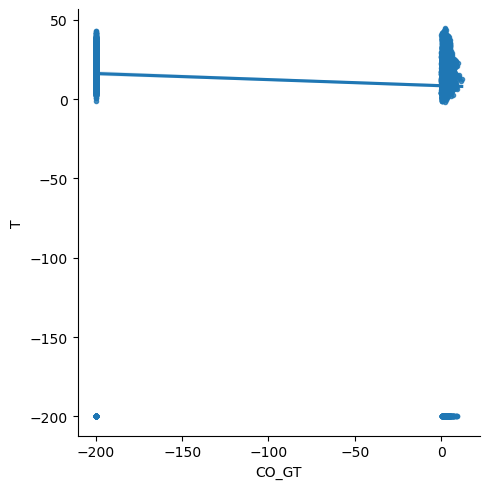

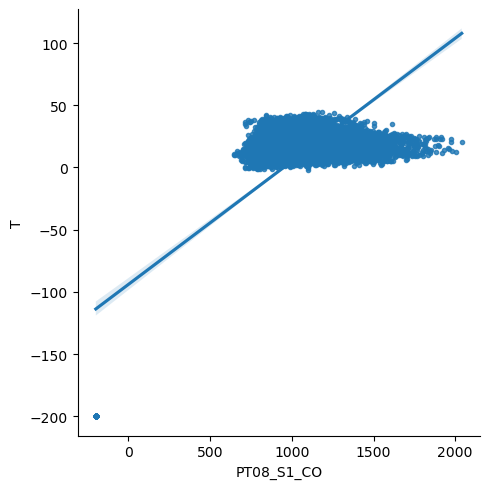

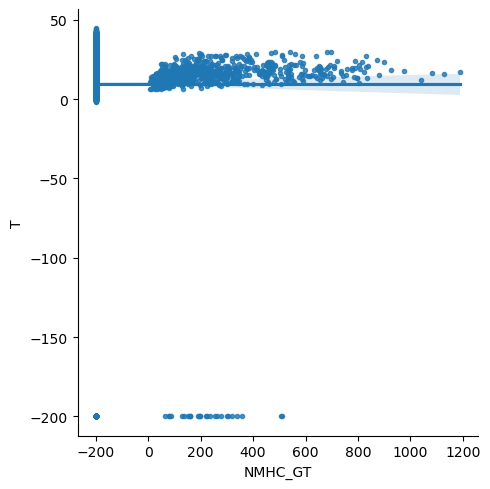

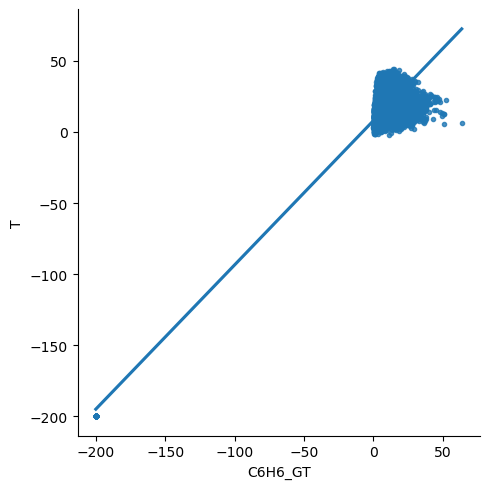

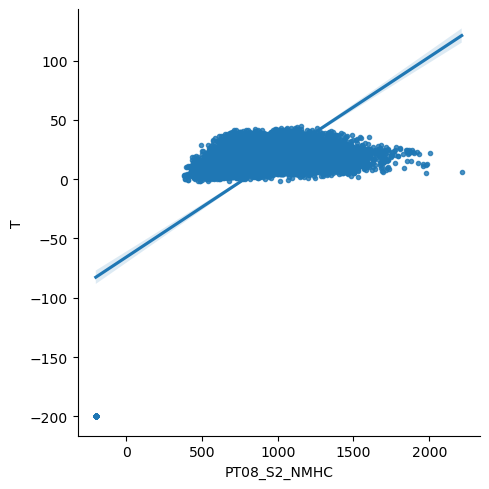

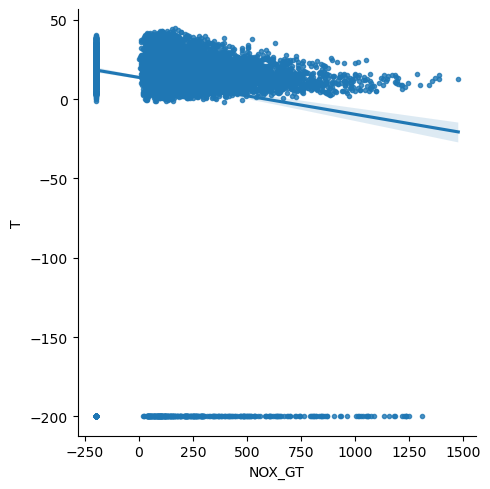

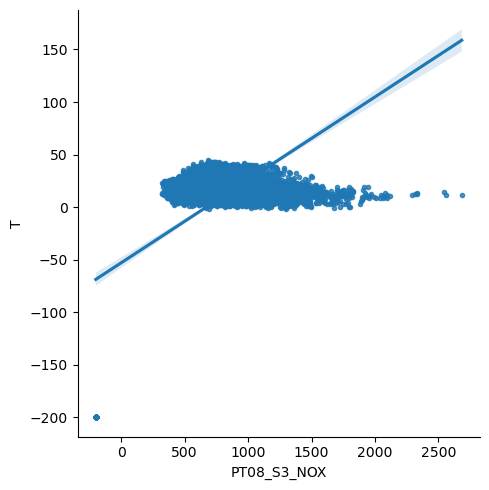

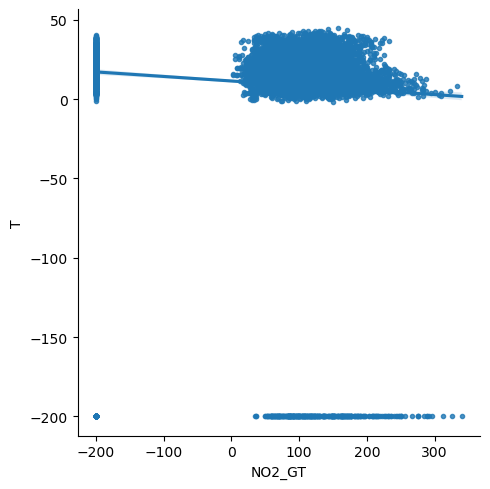

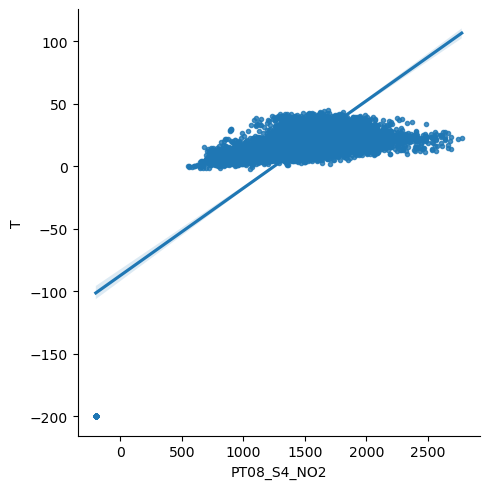

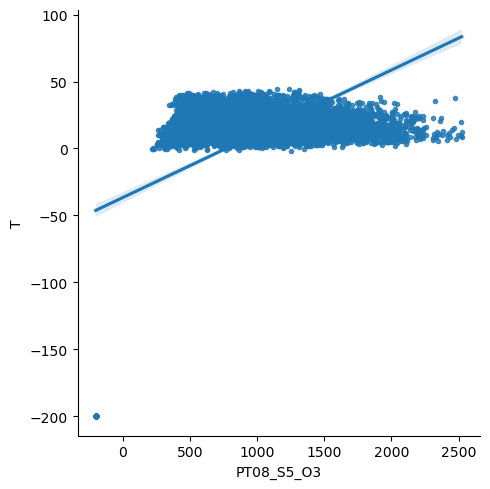

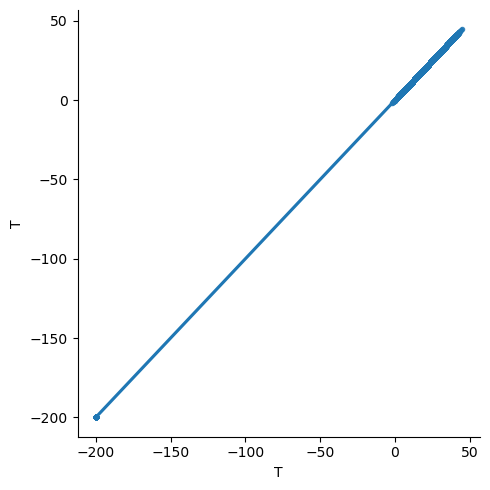

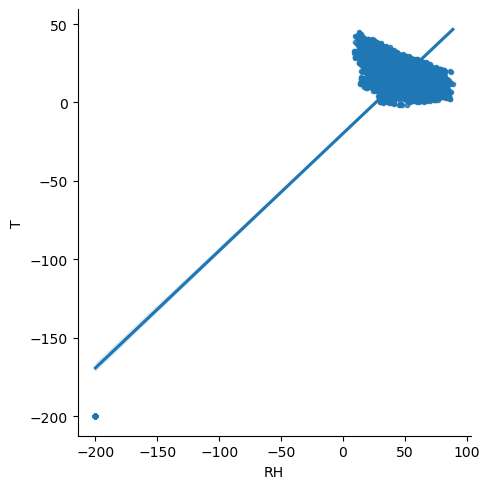

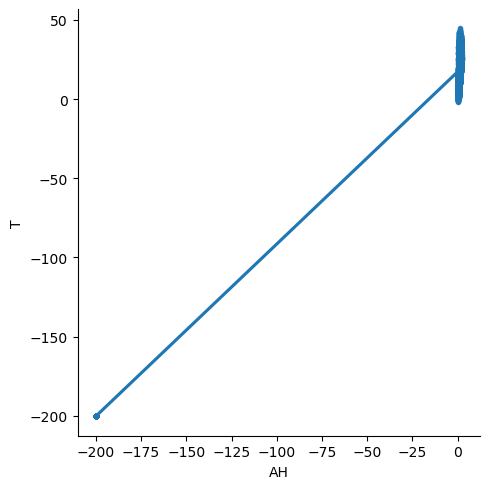

In [10]:
col1=data.columns.tolist()[2:]
for i in data.columns.tolist()[2:]:
    sns.lmplot(x=i,y='T',data=data,markers='.')